In [35]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from matplotlib import container

In [36]:
data_folder = r"E:\data\dao-0310\V4_3\Incentive"
dao_performance_file = data_folder + r"\dao_performance"
consensus_performance_file = data_folder + r"\dao_consensus_performance"
dao_diversity_file = data_folder + r"\dao_diversity"
dao_variance_file = data_folder + r"\dao_variance"
dao_percentile_10_file = data_folder + r"\dao_percentile_10"
dao_percentile_90_file = data_folder + r"\dao_percentile_90"
dao_gini_file = data_folder + r"\dao_gini"
dao_original_performance_file = data_folder + r"\dao_original_performance"

with open(dao_performance_file, 'rb') as infile:
    dao_performance = pickle.load(infile)
with open(dao_diversity_file, 'rb') as infile:
    dao_diversity = pickle.load(infile)
with open(dao_variance_file, 'rb') as infile:
    dao_variance = pickle.load(infile)
with open(dao_gini_file, 'rb') as infile:
    dao_gini = pickle.load(infile)
with open(consensus_performance_file, 'rb') as infile:
    consensus_performance = pickle.load(infile)

with open(dao_original_performance_file, 'rb') as infile:
    dao_original_performance = pickle.load(infile)


In [37]:
print(np.array(dao_performance).shape)

(4, 300)


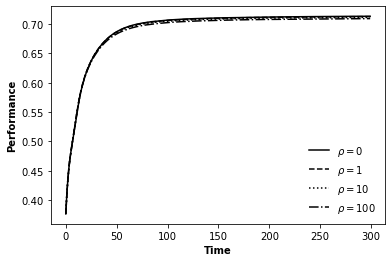

<Figure size 432x288 with 0 Axes>

In [38]:
# Performance
# incentive_list = [0, 1, 10, 100]
x = range(len(dao_performance[0]))
plt.plot(x, dao_performance[0], "k-", label='$\\rho=0$')
plt.plot(x, dao_performance[1], "k--", label='$\\rho=1$')
plt.plot(x, dao_performance[2], "k:", label='$\\rho=10$')
plt.plot(x, dao_performance[3], "k-.", label='$\\rho=100$')
plt.xlabel('Time', fontweight='bold', fontsize=10)
plt.ylabel('Performance', fontweight='bold', fontsize=10)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=10)
plt.savefig(data_folder + r"\Incentive_performance.png", transparent=False, dpi=200)
plt.show()
plt.clf()

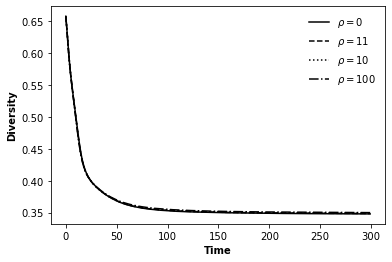

<Figure size 432x288 with 0 Axes>

In [39]:
# Diversity
# incentive_list = [0, 1, 10, 100]
x = range(len(dao_performance[0]))
plt.plot(x, dao_diversity[0], "k-", label='$\\rho=0$')
plt.plot(x, dao_diversity[1], "k--", label='$\\rho=11$')
plt.plot(x, dao_diversity[2], "k:", label='$\\rho=10$')
plt.plot(x, dao_diversity[3], "k-.", label='$\\rho=100$')
plt.xlabel('Time', fontweight='bold', fontsize=10)
plt.ylabel('Diversity', fontweight='bold', fontsize=10)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=10)
plt.savefig(data_folder + r"\Incentive_diversity.png", transparent=True, dpi=200)
plt.show()
plt.clf()

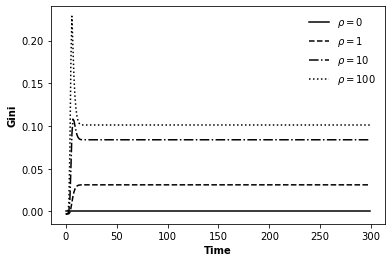

<Figure size 432x288 with 0 Axes>

In [40]:
# Gini
x = range(len(dao_performance[0]))
plt.plot(x, dao_gini[0], "k-", label='$\\rho=0$')
plt.plot(x, dao_gini[1], "k--", label='$\\rho=1$')
plt.plot(x, dao_gini[2], "k-.", label='$\\rho=10$')
plt.plot(x, dao_gini[3], "k:", label='$\\rho=100$')
plt.xlabel('Time', fontweight='bold', fontsize=10)
plt.ylabel('Gini', fontweight='bold', fontsize=10)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=10)
plt.savefig(data_folder + r"\Incentive_gini.png", transparent=True, dpi=200)
plt.show()
plt.clf()

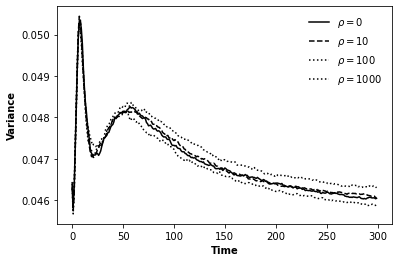

<Figure size 432x288 with 0 Axes>

In [41]:
# Variance
x = range(len(dao_performance[0]))
plt.plot(x, dao_variance[0], "k-", label='$\\rho=0$')
plt.plot(x, dao_variance[1], "k--", label='$\\rho=10$')
plt.plot(x, dao_variance[2], "k:", label='$\\rho=100$')
plt.plot(x, dao_variance[3], "k:", label='$\\rho=1000$')
plt.xlabel('Time', fontweight='bold', fontsize=10)
plt.ylabel('Variance', fontweight='bold', fontsize=10)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=10)
plt.savefig(data_folder + r"\Incentive_variance.png", transparent=True, dpi=200)
plt.show()
plt.clf()

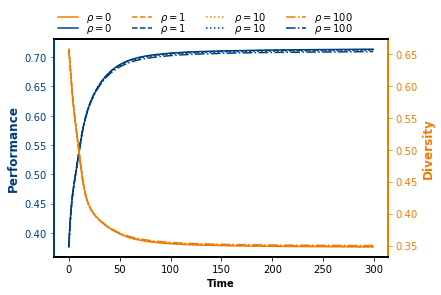

<Figure size 432x288 with 0 Axes>

In [42]:
# Twin
import numpy as np
# x = range(len(dao_performance))

nusblue = "#003D7C"
nusorange = "#EF7C00"
legend_properties = {'weight':'bold'}

fig,ax1 = plt.subplots()
ax1.set_xlabel("Time", fontweight='bold', fontsize = 10)
ax1.set_ylabel("Performance", fontweight='bold', color="black", fontsize=12)

ax2=ax1.twinx()
ax2.set_ylabel("Diversity", fontweight='bold', color="black", fontsize=12)

ax2.spines['left'].set_color(nusblue)
ax2.spines["left"].set_linewidth(2)
ax2.spines['right'].set_color(nusorange)
ax2.spines["right"].set_linewidth(2)
ax2.spines["top"].set_linewidth(2)
ax2.spines["bottom"].set_linewidth(2)
ax2.yaxis.label.set_color(nusorange)
ax2.tick_params(axis='y', colors=nusorange)

ax1.yaxis.label.set_color(nusblue)
ax1.tick_params(axis='y', colors=nusblue)


line_1 = ax1.plot(x, dao_performance[0], "k-", color=nusblue, label='$\\rho=0$')
line_2 = ax1.plot(x, dao_performance[1], "k--", color = nusblue, label='$\\rho=1$')
line_3 = ax1.plot(x, dao_performance[2], "k:", color = nusblue, label='$\\rho=10$')
line_4 = ax1.plot(x, dao_performance[3], "k-.", color = nusblue, label='$\\rho=100$')

line_5 = ax2.plot(x, dao_diversity[0], "k-", color= nusorange, label='$\\rho=0$')
line_6 = ax2.plot(x, dao_diversity[1], "k--", color = nusorange, label='$\\rho=1$')
line_7 = ax2.plot(x, dao_diversity[2], "k:", color = nusorange, label='$\\rho=10$')
line_8 = ax2.plot(x, dao_diversity[3], "k-.", color = nusorange, label='$\\rho=100$')

lines_1 = line_1 + line_2 + line_3 + line_4
labs_1 = [l.get_label() for l in lines_1]
ax1.legend(lines_1, labs_1, frameon=False, fontsize=12, loc=(0, 1),  ncol=len(lines_1), prop=legend_properties)

lines_2 = line_5 + line_6 + line_7 + line_8
labs_2 = [l.get_label() for l in lines_2]

ax2.legend(lines_2, labs_2, frameon=False, fontsize=12, loc=(0, 1.05),  ncol=len(lines_2), prop=legend_properties)

plt.savefig(data_folder + r"\Incentive_performance_diversity.png", transparent=True, dpi=200, bbox_inches='tight')
plt.show()
plt.clf()
